# Control statements, iteration, and apply functions

Joshua P. French  
October 30, 2023

To open this information in an interactive Colab notebook, click the
Open in Colab graphic below.

<a href="https://colab.research.google.com/github/jfrench/DataWrangleViz/blob/master/08-control-statements-iteration-apply.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg">
</a>

------------------------------------------------------------------------

In this module we will discuss control statements, iteration, and apply
functions. These are fundamental tools used in R programming. A simple
analysis will not need them, but as we analyze more complex data, these
tools will be critical in completing our analyses.

We start by making sure the necessary R packages are installed.

In [2]:
if(!require(microbenchmark, quietly = TRUE)) {
  install.packages("microbenchmark",
                   repos = "https://cran.rstudio.com/")
}

In [3]:
if(!require(pbapply, quietly = TRUE)) {
  install.packages("pbapply",
                   repos = "https://cran.rstudio.com/")
}

In [4]:
if(!require(future.apply, quietly = TRUE)) {
  install.packages("future.apply",
                   repos = "https://cran.rstudio.com/")
}

# Control statements

A control statement is code that controls what is executed later in the
program or script. The most well-known examples are “if-else” and
“switch” statements.

## `if`, `else if` and `else`

If-else statements in R rely on 3 functions: `if`, `elseif`, `else`.

-   The `if` statement can be used by itself.
-   The `else` statement must be used in conjunction with the `if`
    function.
-   `else if` must be used in conjunction with the `if` statement and
    should be used with an `else` statement (otherwise there may be
    cases that are left out).

An `if` or `else if` statement is used to perform a sequence of commands
when its argument is `TRUE`.

An `else` statement is used to perform a sequence of commands when all
previous control statement arguments are `FALSE` in a group of control
statements.

A set of `if`, `else if`, and `else` statements will having the
following structure:

    if (logical statement) {
      # code to run if logical statement is true
    } else if (another logical statement) {
      # code to run if another logical statement is true
    } else {
      # code to run if none of the other logical statements were true
    }

The curly braces, `{}`, are used to indicate the set of commands we want
to execute if the logical statement is true.

The `else if` and `else` statements should be one space after the `}`
used to indicate the end if the previous `if` or `elseif` statement.

It is common to indent the code within a control statement by one tab to
make the code easier to read.

### Categorization example

According to the CareGivers of America at
<https://caregiversofamerica.com/2022-generation-names-explained/>, here
is a breakdown of birth years for seven recent generations.

-   The Greatest Generation: born 1901-1927.
-   The Silent Generation: born 1928-1945.
-   The Baby Boomer Generation: born 1946-1964.
-   Generation X: born 1965-1980.
-   Millennials: born 1981-1996.
-   Generation Z: born 1997-2012.
-   Gen Alpha: born 2013 – 2025.

Let’s say we have a vector with the birth year of an individual and we
wish to identify the individual’s generation based on the dates above.
We can do this using a sequence of control statements. For simplicity,
we only use the last four generations (Millennials, Generation Z, Gen
Alpha, and Other).

We create a sequence of control statements to categorize the generation
of a single number stored in the `year` object.

We set `year` to `1950`.

In [5]:
year <- 1950

Now we create a sequence of control statements to categorize the `year`
variable

In [6]:
if (year >= 1981 & year <= 1996) {
  generation <- "millennial"
} else if (year >= 1997 & year <= 2012) {
  generation <- "generation z"  
} else if (year >= 2013 & year <= 2025) {
  generation <- "gen alpha"
} else {
  generation <- "other"
}

We now look at the result stored in `generation`.

In [7]:
generation

As expected, `generation` categorizes a person born in 1950 as being
part of the `"other"` generation.

It would be even better if we made a function to do this categorization
so that we can do the categorization for many different values of
`year`.

We create a function, `determine_generation`, that takes the argument
`year` and returns the generation corresponding to that year.

In [8]:
determine_generation <- function(year) {
  if (year >= 1981 & year <= 1996) {
    generation <- "millennial"
  } else if (year >= 1997 & year <= 2012) {
    generation <- "generation z"  
  } else if (year >= 2013 & year <= 2025) {
    generation <- "gen alpha"
  } else {
    generation <- "other"
  }
  return(generation)
}

We now use the function to determine the generation associated with the
value 1985.

In [9]:
determine_generation(1985)

The above example is trivial and unrealistic. E.g., our control
statements won’t work with a vector of inputs. Additionally, it doesn’t
handle cases like non-integer values very well (what generation is
1981.5?). However, it paints a picture of what can be done using control
statements.

## The `switch` function

The `switch` function is a compact way of evaluating a set of `if`,
`elseif`, and `else` statements when we need to change our action
depending on a single value argument that can only take a small number
of values.

The `switch` function takes the following arguments:

-   `EXPR`: a single value that evaluates to a number or character
    string.
-   … A list of what to do based on the value of `EXPR`.

### Animal example

Let’s create a function called `sound` that takes a single character
value `animal` and returns the “sound” associated with that animal.

The `switch` function takes the value in `animal` and then decides what
to do.

In [10]:
sound <- function(animal) {
  switch(animal, 
         "dog" = "ruff",
         "cat" = "meow",
         "horse" = "neigh",
         "frog" = "ribbit",
         "cow" = "moo",
         "duck" = "quack",
         "rooster" = "keekarikee",
         "coyote" = "yipp",
         "donkey" = "hee-haw",
         "we don't know what sound this animal makes")
}

-   If `animal` is `"dog"`, then the `switch` function returns `"ruff"`.
-   If `animal` is `"cat"`, then the `switch` function returns `"meow"`.
-   The last input to the `switch` argument in the above example is what
    we want to return if the value of `animal` doesn’t match any of the
    previous choices.

Let’s use this function.

In [11]:
sound("dog")

In [12]:
sound("duck")

In [13]:
sound("goose")

# Iteration

Iteration in programming is when we repeatedly (i.e., iteratively) run
the same code block until some condition is satisfied.

The two *main* iteration approaches in R are `for` and `while` loops.

There is also a `repeat` loop that repeatedly runs the same set of code
until the `break` function is used.

-   The `break` function is used to “break out” of the current iteration
    of the inner-most loop.
-   The `next` function is used stop the current iteration and advance
    the looping index.

I have never once used the `repeat`, `break`, or `next` functions in
over 20 years of R programming. While I’m sure they have their uses,
they are not commonly used nor needed, so we will not be covering them.

## `for` loops

### Basic `for` loops

`for` loops are useful if we know in advance the set of values that we
want to iterate over. E.g., we may want to perform an action for integer
values running from 1 to 100.

The basic syntax of a `for` loop is shown in the psuedo code below.

    for (i in vector_of_values) {
      # some code to run
    }

We have the following components of the `for` loop:

-   The loop starts with `for`, which indicates that we want to perform
    a `for` loop.
-   Inside parentheses after `for`, we have the iterator name, which is
    the name of the variable that our loop is changing. In this example,
    we called the iterator `i`. Names like `i`, `j`, `k`, and `l` are
    commonly used, but we can use any name that won’t conflict with
    other object in memory.
-   After the iterator name, we use the syntax “`in`”, which indicates
    that our iterator will take the values in `vector_of_values`.
-   `vector_of_values` is a vector containing the values the iterator
    can take as we progress through the loop.
-   After the parenthesis, we use the curly braces `{}` to indicate the
    code we want to run in our loop.
-   The `#some code to run` is the code we wish to execute in our loop.

Here’s what happens in a `for` loop:

1.  The iterator takes the first value in `vector_of_values`.
2.  Using that iterator value, the loop runs the code in the curly
    braces.
3.  After that code runs, the `for` function will change the iterator to
    the next value in `vector_of_values`.
4.  We repeat steps 2 and 3 until there are no more values in
    `vector_of_values`.
5.  We exit the loop.

Here’s an example of a simple `for` loop that prints the current
iterator value for the values 1, 2, and 3.

In [14]:
for (i in 1:3) {
  message("The current iterator value is ", i)
}

The `message` function prints a diagnostic message to the screen. Notice
that the `message` function can combine text and numeric values into a
single message. We have to manually include spaces in the text.

Here is a loop that takes a character string of animal names and returns
the sound made by the animal. We use the `sound` function we previously
created.

In [15]:
for (animal in c("dog", "cat", "coyote")) {
  current_sound <- sound(animal)
  message("The ", animal, " makes the sound ", current_sound, ".")
}

### Q-q plot example

Let’s create a more realistic `for` loop example involving
quantile-quantile plots (q-q plots).

A q-q plot is a way to compare the quantiles observed for a data set
with the theoretical quantiles we expect if the data comes from a
certain distribution.

-   We plot the pairs of quantiles in a scatter plot.
-   If the points of the q-q plot fall close to a straight line, then it
    is plausible that the observed data are a sample from the
    theoretical distribution.

Here’s an example of what a q-q plot might look like if the observed
data are a random sample from the theoretical distribution being
considered.

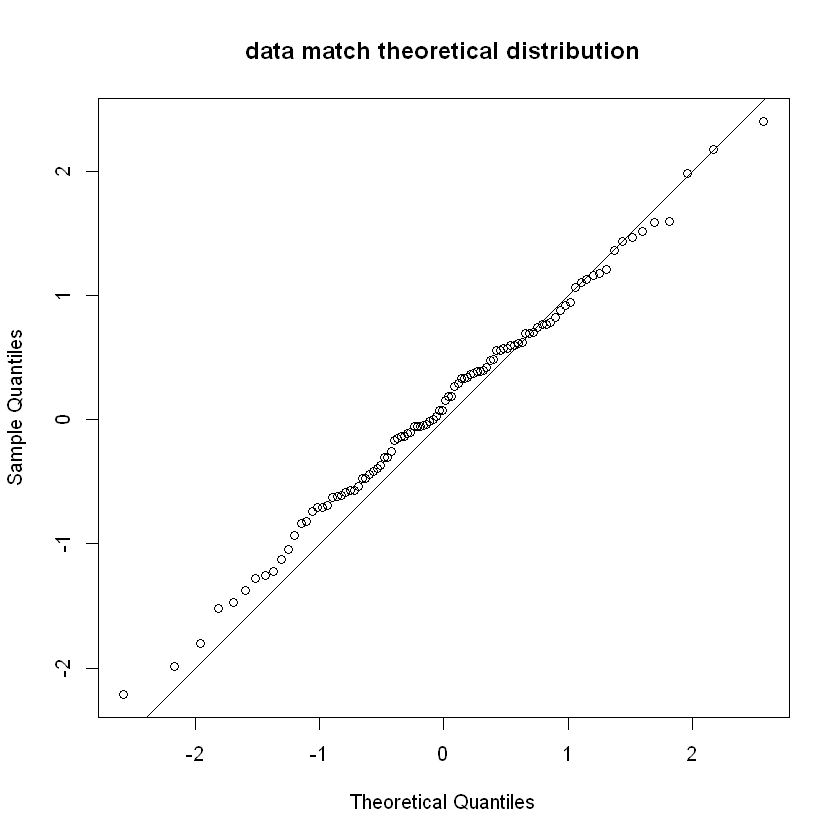

Here’s an example of what a q-q plot might look like if the observed
data are a random sample from a distribution very different from the
theoretical distribution being considered.

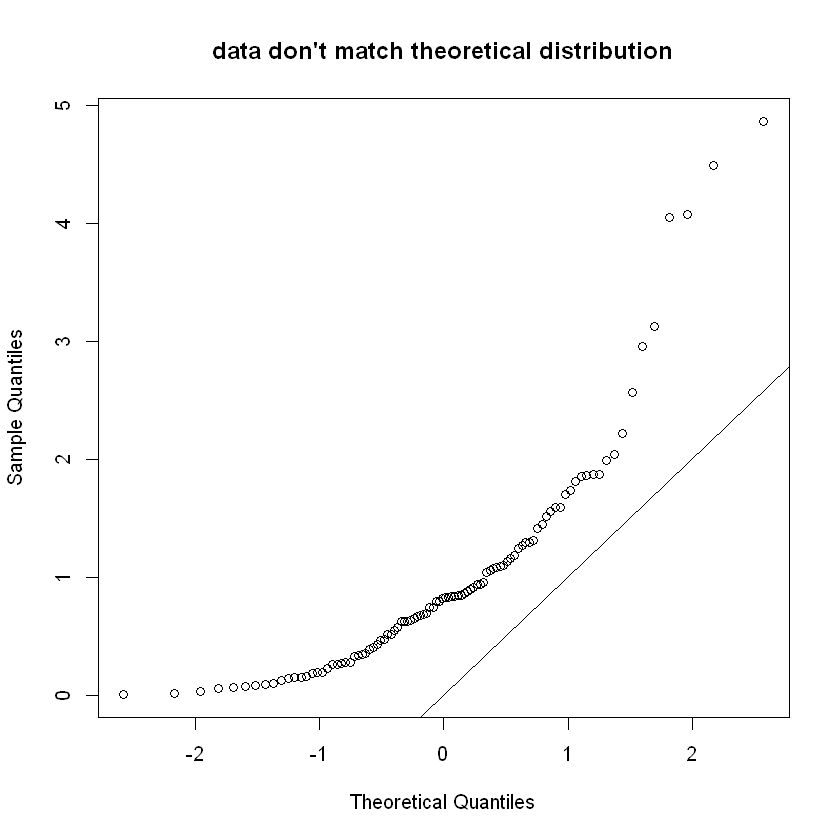

Q-q plots are often used to evaluate whether data seems to have come
from a normally-distributed population. However, each random sample from
the population will vary. How much variability can we expect in our q-q
plot if the data are a random sample from a normally-distributed
population?

In the code below, we:

1.  Use the `set.seed` function to make our example reproducible.
2.  Use the `mfrow` argument of the `par` function to create a plotting
    grid of size 2x2.
3.  Use a `for` loop to iterate over the values 1, 2, 3, 4. For each
    value of the iterator:
    1.  Use the `rnorm` function to draw a random sample of 20 values
        from a normal population with mean 0 and standard deviation 1.
    2.  Use the `qqnorm` function to create a q-q plot for the random
        sample based on a normal population.
    3.  Use the `abline` function add a 45 degree reference line for
        convenience.
4.  Use the `par` function to reset the plotting grid to size 1x1.

In [18]:
# make example reproducible
set.seed(33)
# create 2x2 plotting grid
par(mfrow = c(2, 2))
# draw normal samples, create q-q plot
for (i in 1:4) {
  # draw 20 values from a N(0, 1) population
  s <- rnorm(20)
  # draw q-q plot for sample using normal distribution
  qqnorm(s)
  # draw reference line
  abline(0, 1)
}
# reset plotting grid to 1x1
par(mfrow = c(1, 1))

### KNN example

We now use a `for` loop to determine the K nearest neighbors of a set of
locations. For each location, we determine the K locations that are
nearest to the current location. These K locations are the nearest
neighbors of the current location.

We start be generating a random set of 25 coordinates where the x- and
y-values can take any value between 0 and 1. In the code below, we:

-   Use `set.seed` to make sure the example is reproducible.
-   Use the `runif` function to draw a random sample of 50 values
    between 0 and 1 based on a uniform distribution.
-   Store these values in a `matrix` with 25 rows and 2 columns that has
    the name `coords`.

In [19]:
set.seed(1989)
coords <- matrix(runif(50), ncol = 2)

We plot the coordinates using the `plot` function.

In [20]:
plot(coords, xlab = "x", ylab = "y")

We will determine the 3 nearest neighbors of each observation using a
`for` loop. We will store our results in a `list` with 25 elements. Each
element of the `list` will be a `numeric` `vector` of length 3
indicating the 3 nearest neighbors of the current location. We could
store this in a `matrix` for efficiency, but we use a `list` to get
broader exposure to the R programming language.

We start by creating `nnlist`, which is the `list` that will store the
nearest neighbors for each location. We can create an empty vector using
the `vector` function, specifying `mode = "list"`, then indicating the
length of the `list`.

In [21]:
nnlist <- vector(mode = "list", length = nrow(coords))

Why did we specify `length = nrow(coords)` instead of `length = 25`?
This allows us to adapt our code to a new set of locations that may not
be the same size.

*It is wise not to “hard code” values (like the size of a `matrix` or
`list` or even the values for a loop) into our code to make it easier to
use the code for a new setting.*

To find the nearest neighbors of each location, we need to find the
distances between locations.

The `dist` function can be used to determine the distances between the
coordinates contained in a `matrix` object. The function can compute
many kinds of distance, but the default is `"euclidean"`, which is what
we need. By default, the `dist` function doesn’t return the diagonal
elements of the distance matrix nor the upper diagonal elements. A trick
to get the complete distance matrix is to use the `as.matrix` function
on the object returned by the `dist` function. The value contained in
row `i` and column `j` of the distance matrix is the distance between
the $i$th location and the $j$th location.

With all that being said, we compute the distance matrix for the
locations in `coords`.

In [22]:
d <- as.matrix(dist(coords))

This matrix is too big to look at easily. However, from the code below,
we can see that the distance between the 3 and 17th locations is
0.474391.

In [23]:
d[3, 17]

How do we find the locations nearest the current location? We need to
find the locations that have the smallest distance from the current
location. The easiest way to do this in R is using the `order` function.

The `order` function takes a vector of values and indicates which
positions of the vector contain the smallest values, in ascending order.
The `decreasing` argument of `order` can be changed to `TRUE` to order
the values in descending order.

Here’s a quick example that uses the `order` functions to order the
values of a `numeric` `vector` from smallest to largest.

In [24]:
order(c(5, 1, 2, 4))

The second element of the vector we gave to `order` has the smallest
value. The third element has the second smallest value. The fourth
element has the next smallest value. The first element has the largest
value.

We can use the `order` function to order the distances associated with
each location. Let’s do this for the first location in `coords`. We pass
the vector of distances between the first location and all other
locations (including itself) to the `order` function. This vector of
distances is simply the first row of `d`.

In [25]:
order(d[1,])

Unsurprisingly, the first location is “closest” to itself. The next
closest location is location 23. The next location after that is
location 21, then 21, then 15, etc. A K nearest neighbors algorithm
doesn’t usually allow a location to be its own neighbor. So, in our
case, we want to select the second through fourth elements of the
ordered distances. We can do that using the code below.

In [26]:
od1 <- order(d[1,])
od1[2:4]

Now, we will use a loop to repeat this process for all locations in
`coords`. For each location we will order the distances, determine the
indices of the 3 nearest neighbors, and then place the nearest neighbor
indices in the appropriate elements of `nnlist`.

In [27]:
for (i in 1:length(nnlist)) {
  # order the distances associated with the ith location
  odi <- order(d[i, ])
  # extract the 3 nearest neighbors for observation i
  # (not including the location itself)
  nni <- odi[2:4]
  # put the nn of observation i in the ith position of nnlist
  nnlist[[i]] <- nni
}

We look at the first 3 elements of `nnlist`.

In [28]:
nnlist[1:3]

The nearest neighbors of the first location are locations 23, 21, and
15.

The nearest neigbhors of the second location are locations 11, 25, and
18.

The nearest neighbors of the third location are locations 21, 12, and
15.

### Nested `for` loops

A nested `for` loop is one that uses one or more `for` loops inside of
another `for` loop. Here is some pseudo code to illustrate a nested
`for` loop.

    for (i in i_vector) {
      # some code
      for (j in j_vector) {
        # some code
        for (k in k_vector) {
          # some code
        }
        # some code
      }
      # some code
    }

The psuedo code above has 3 loops. The outermost loop is iterating over
`i`, the innermost loop is iterating over `k`, while the second loop is
iterating over `j`.

The innermost loop iterates the fastest. This is because for each value
if `i` and `j`, we iterate `k` through all the values in `k_vector`. The
second loop iterates the second fastest because it iterates through all
the values in the `j_vector` for a single value of `i`, but not as fast
as innermost loop, which will have iterated `k` through the all the
values in `k_vector` `length(j_vector)` times!

It is helpful to use proper formatting to make the code easier to
process. Make sure to indent the code inside a `for` loop to indicate
that it is run instide a certain `for` loop.

We will use a double loop to compute the distance matrix of a set of
coordinates.

Recall that if $(x_i, y_i)$ and $(x_j, y_j)$ are two points, then the
Euclidean distance between them is computed as

<span id="eq-dij">$$
d_{i,j} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}.
 \qquad(1)$$</span>

Let’s create a small set of 5 coordinates.

In [29]:
coords <- cbind(c(1, 4, 2, 5, 3), c(9, 4, 3, 2, 1))
coords

Each row of `coords` represents a location. For each row of `coords`, we
need to iterate over all the locations of `coords`. For each combination
of locations, we need to use [Equation 1](#eq-dij) to compute the
distance between the locations.

We create a matrix, `d`, to store the distances we compute in our loop.

In [30]:
d <- matrix(nrow = nrow(coords), ncol = nrow(coords))

We now compute the distances for all pairs of locations.

In [31]:
# compute distances
for (i in 1:nrow(coords)) {
  for (j in 1:nrow(coords)) {
    d[i, j] <- sqrt((coords[i, 1] - coords[j, 1])^2 + 
                      (coords[i, 2] - coords[j, 2])^2)
  }
}
d # print d

We can compare this to the output of the `dist` function to confirm that
we have computed the distances correctly.

In [32]:
as.matrix(dist(coords))

## `while` loops

A `while` loop is a loop that repeats a set of actions while a condition
is `TRUE`. The loop stops running when the provided condition is
`FALSE`.

A `while` loop can be used to do the same thing as a `for` loop but is
better suited for situations for which we don’t know how many times we
need to iterate.

A common use of a `while` loop is to iteratively improve an
approximation one iteration at a time until the change in the
approximation is smaller than some standard of precision.

The basic syntax of a `while` loop is shown in the psuedo code below.

    while (condition) {
      # some code to run
    }

We have the following components of the `while` loop:

-   The loop starts with `while`, which indicates that we want to
    implement a `while` loop.
-   Inside the parentheses after `while`, we have a `condition`.
-   If `condition` is `TRUE`, we run the code in between the curly
    braces.
-   We then return to the `condition`. If `condition` is still `TRUE`,
    then we run the code in between the curly praces again.
-   We keep repeating the previous step until `condition` is `FALSE`.

We can read a `while` loop in the following way: While our condition is
`TRUE`, run the following code.

Here’s what happens in a `while` loop:

1.  We check whether our condition is `TRUE`.
2.  If the condition is `TRUE`, then we run the code in the curly
    braces. This code will perform some actions that should potentially
    have an impact on the condition.
3.  We repeat steps 1 and 2 until our condition is `FALSE`.
4.  We exit the loop.

We provide a trivial example of a `while` loop that prints the current
value of an iterator, `i`.

-   We initially set `i` to `1`.
-   The `while` loop runs as long as `i` is less than 4.
-   We print the current value of `i` and then increment `i` (meaning we
    increase it by 1). - We repeat printing the current value of `i`
    until `i` is 4.

In [33]:
# set iterator
i <- 1
while (i < 4) {
  message("The current iterator value is ", i)
  i <- i + 1
}

`while` loops tend to be more dangerous than `for` loops because it is
easy create an “infinite loop” \`that never stops running.

An infinite loop occurs when our `while` condition is always satisfied,
so the loop keeps running indefinitely or until an error occurs (like
running out of memory).

If we want to crash our computer, we can run the following code:

    i <- 2
    while (i > 0) {
      i = i^2
    }

In the code above, we start by setting `i` equal to `2`. We then check
whether `i` is more than 0. If it is more than 0 then we update `i` to
be the current value of `i` squared. Our condition will always be
`TRUE`, so we keep squaring the current value of `i` indefinitely.

If we are stuck in an infinite loop, then:

-   Pressing `Ctrl + c` (PC) or `Cmd + c` (Mac) may stop a loop.
-   Sometimes, a “STOP” button is available in the Console. Clicking
    this button will attempt to stop a loop.
-   In R Studio, we can click “Session” in the Menu and then click
    “Interrupt R” to stop the code being executed.

### Bisection example

The bisection method is a method for finding the “zeros” or “roots” of a
continuous function, i.e., where the function equals 0.

The bisection method requires that we start the algorithm at two values
such that the function has opposite signs for those values.

Suppose we have a continuous function, $f(x)$.

The bisection method is implemented in the following way:

1.  Find two points, $a$ and $b$, such that $a < b$ and $f(a)f(b) < 0$.
2.  Compute the average of $a$ and $b$, $m = (a + b)/2$
3.  Determine whether \$ \| f(m) \| \> \$, where $\epsilon$ is some very
    small positive number like 0.0001. If our condition is satisfied,
    perform the following steps:
    1.  If $f(m)f(a) < 0$, then a root exists between $a$ and $m$. Set
        $b = m$ and return to step 2.
    2.  Otherwise, a root exists between $m$ and $b$. Set $a = m$ and
        return to step 2.

When our condition is NOT satisfied, we have found an (approximate) root
of our function.

We now create a function, `bisect`, that implements the bisection
method. The function will take arguments:

-   `lower`: The smaller starting value used to implement the bisection
    method.
-   `upper`: The upper starting value used to implement the bisection
    method.
-   `fun`: A continuous function that can take both positive and
    negative values.
-   `eps`: A tolerance value indicating how close we must be to a true
    “zero”.

We implement the bisection method below. We:

1.  Start by checking whether `fun(lower) * fun(upper) > 0`. If this is
    `TRUE`, then then the bisection algorithm may fail and we might end
    up in an infinite loop!. We use the `stop` function to exit the
    function with an error if we have bad starting values.
2.  Compute `m` using the `lower` and `upper` values.
3.  Check if `m` is a root. If it’s not a root:
    1.  Use a control statement to decide whether to update the `lower`
        or `upper` value to `m`.
    2.  Compute `m` using the `lower` and `upper` values.
    3.  Return so step 3.
4.  Return the final value of `m`, which is an (approximate) root of
    `fun`.

In [34]:
bisect <- function(lower, upper, fun, eps = 0.0001) {
  # make sure our initial lower and upper values produce
  # opposite signs when plugged into fun
  if (fun(lower) * fun(upper) > 0) {
    stop("\nBig yikes!",
         "\nThose starting values are sus.",
         "\nYou need to glow up those values so  that fun(lower) * fun(upper) < 0.")
  }
  # compute m
  m <- (lower + upper)/2
  # determine if we're at (or really close to a root)
  while (abs(fun(m)) > eps) { # if we're not close to a root
    # determine whether a root is below m or above m
    if (fun(m) * fun(lower) < 0) { # if the root is below m
      upper <- m
    } else { # if the root is above m
      lower <- m
    }
    # determine a new candidate for m
    m <- (lower + upper)/2
  }
  return(m)
}

Consider the continuous polynomial function $$
f(x) = (x - 3)(x + 1).
$$

From looking at this equation, we can easily verify that $f(x) = 0$ when
$x = 3$ or $x = -1$.

We create a function for $f(x)$ below.

In [35]:
f <- function(x) {
  (x - 3) * (x + 1)
}

We now plot $f(x)$ for for a sequence of $x$ values between -2 and 4.

In [36]:
xs <- seq(-2, 4, len = 1000)
plot(xs, f(xs), type = "l", xlab = "x", ylab = "f(x)")

We will try to find a root of `f` using `bisect` using starting values
of `2` and `5`.

In [37]:
bisect(lower = 2, upper = 5, fun = f)

If we choose different starting values then we can find the other root
of $f$.

In [38]:
bisect(lower = -2, upper = 1, fun = f)

What happens if we choose bad starting values?

In [39]:
bisect(lower = -4, upper = 5, fun = f)

## Loops versus vectorization

Loops in R are notoriously slow.

When possible, we should prefer *vectorized operations* over loops.

A **vectorized** operation uses a fast, pre-compiled function to apply
an operation to all elements of a vector, matrix, list, etc., without
using a loop.

Here is a trivial example demonstrating the the speed and power of
vectorization over loops.

Let’s say we want to compute the cumulative sum of a set of numeric
values. The cumulative sum of a vector of numeric values is the sum of
each value and all the previous values in the vector. The cumulative sum
of the vector $[1, 2, 4]$ is $[1, 3, 7]$.

We create a function, `cumsum_loop`, to compute the cumulative sum of a
numeric vector. We describe our approach:

-   The function takes, `x`, which we assume is a numeric vector.
-   We create a vector, `results`, to store our cumulative sums.
-   We create a `for` loop to iterate `i` over every element of `x`. For
    each value of `i`, we:
    -   Check if we are considering the first element of `x`. If we are,
        then `results[i]` is simply the value in the first position of
        `x`.
    -   If we are not considering the first element of `x`, then the
        cumulative sum of the first `i` elements of `x` is the value in
        the $i$th position of `x`, `x[i]`, plus the previous value of
        the cumulative sum, `results[i - 1]`.
-   After we iterating over all positions of `x`, we return the
    `results` vector.

In [40]:
cumsum_loop <- function(x) {
  # create vector of results
  results <- numeric(length(x))
  for (i in 1:length(x)) {
    if (i == 1) {
      results[i] <- x[i]
    } else {
      results[i] <- results[i - 1] + x[i]
    }
  }
  return(results)
}

Let’s try this function on the vector $[1, 2, 4]$.

In [41]:
cumsum_loop(c(1, 2, 4))

What is wrong with this function? Nothing, really. Except that it’s slow
compared to the equivalent vectorized version of this calculation.

The `cumsum` function is a vectorized version of a cumulative sum that
relies on fast, pre-compiled code. We can see that it gives the same
results as the function we created.

In [42]:
cumsum(c(1, 2, 4))

We use the `microbenchmark` function in the **microbenchmark** package
(Mersmann 2023) to compare the timings of `cumsum_loop` and `cumsum`.
The `microbenchmark` function will run the provided functions 100 times,
by default.

-   We sample 1000 values from a standard normal distribution.,
-   We use `microbenchmark` to time how long it takes to compute the
    cumulative sum of the sampled values using both cumulative sum
    functions. We repeat this timing 100 times for each function.
-   We plot the results for comparison.

In [43]:
# attach microbenchmark
library(microbenchmark) 
# draw 1000 values from a N(0, 1) distribution
x <- rnorm(1000)
# compute the cumulative sum 100 times using both approaches
cumsum_timings <- microbenchmark(cumsum_loop(x), cumsum(x))
# plot timing results
plot(cumsum_timings)

While the exact timing results will depend on the computer the timings
are performed on, the plot above will clearly show that the vectorized
`cumsum` function is substantially faster than the `cumsum_loop`
function.

These results may seem trivial, but for large data sets where these
operations are performed thousands or millions of times, vectorized
operations can be many orders of magnitude faster than loops.

# The vectorized \*apply functions

The `*apply` functions are a set of vectorized functions that can be
applied different object types. The “`*`” in `*apply` is a “wildcard”
character, meaning that it can be any set of characters.

`*apply` functions will typically perform operations much faster than
equivalent operations implemented using loops. `*apply` functions also
make code simpler and more elegant.

[Table 1](#tbl-apply) summarizes the various `*apply` functions
available by default in R.

| name   | description                                                                                |
|:-----|:-----------------------------------------------------------------|
| apply  | Applies a function to the margins of a data frame, matrix, or array.                       |
| lapply | Applies a function to each element of a list.                                              |
| sapply | A version of `lapply` that attempts to simplify the results to a vector, matrix, or array. |
| vapply | A safer version of `sapply` that returns a pre-specified type of return value.             |
| tapply | Applies a function to a vector or data frame based on the levels of a categorical variable |
| mapply | A multivariate version of `sapply`.                                                        |

Table 1: A summary of the various `*apply` functions available in R.

### The `apply` function

The `apply` function applies a function to a margin (dimension) of a
data frame, matrix, or array.

The primary arguments of the `apply` function are:

-   `X`: A data frame, `matrix`, or `array`.
-   `MARGIN`: a vector indicating the dimension to apply the function
    to. `1` indicates rows, `2` indicates columns, `3` indicates the
    third dimension of an array, `1:2` indicates row and columns, etc.
-   `FUN`: the function to be applied to the margins of `X`.
-   `...`: additional arguments that need to be passed to `FUN`.
-   `simplify`: a logical value indicating whether results should be
    simplified, if possible. The default is `TRUE`.

We provide several example using the `apply` function below.

Consider the matrix `mat` below.

In [45]:
mat <- cbind(1:5, 6:10)
mat

We can compute the mean value for each row of `mat` by running the
command below.

In [46]:
apply(X = mat, MARGIN = 1, FUN = mean)

We can compute the mean value for each column of `mat` by running the
command below.

In [47]:
apply(mat, 2, mean)

Note that the `rowMeans` and `colMeans` functions would have produced
the same results, with simpler code. However, the examples above are
simple examples to illustrate usage of the `apply` function.

What if we want to apply a function that has arguments we need to
specify? E.g., let’s say we want to compute the 0.8 quantile of a set of
values in a numeric vector `x`. We could run the command
`quantile(x, prob = 0.8)`. How can we use a function like this with the
`apply` function?

The code below uses `apply` to compute the 0.8 quantile for each column
of `mat`.

In [48]:
apply(mat, 2, quantile, prob = 0.8)

Lastly, we consider a basic application of the `apply` function a
3-dimensional array.

We create a 3-dimensional array with dimension $3\times 2 \times 4$
below.

In [49]:
A <- array(1:24, dim = c(3, 2, 4))
A

Let’s compute means for each row of `A`.

In [50]:
apply(A, 1, mean)

`11.5` comes from averaging all the values in the 1st row of `A` across
all columns and the third dimension:
`(1 + 4 + 7 + 10 + 13 + 16 + 19 + 22)/8 = 11.5`. More simply, it is
equivalent to running the following command.

In [51]:
mean(A[1,,])

`12.5` and `13.5` come from averaging all the values in the second and
third rows of `A`, respectively.

Let’s compute the sums across the third dimension of `A`.

In [52]:
apply(A, 3, sum)

`21` comes from adding all the values in the first element of the third
dimension of `A`. More specifically, it is equivalent to running the
following comman.

In [53]:
sum(A[,,1])

Let’s compute the means across the row and columns of `A`.

In [54]:
apply(A, 1:2, mean)

The command above returns the values obtained by averaging all of the
values in a particular row and column of `A` across the third dimension
of `A`.

`10` comes from averaging the values in `A[1, 1, 1]`, `A[1, 1, 2]`,
`A[1, 1, 3]`, `A[1, 1, 4]`, i.e., `(1 + 7 + 13 + 19)/4 = 10`.
Alternatively, it is equivalent to running the following command.

In [55]:
mean(A[1, 1, ])

## The `lapply`, `sapply`, and `vapply` functions.

The `lapply` function applies a function to each element of an atomic
vector or list. It is very convenient for performing analyses in
simulation studies. The `lapply` function always returns a list.

The arguments of the `lapply` function are:

-   `X`: An atomic vector or list.
-   `FUN`: the function to be applied to each element of `X`.
-   `...`: additional arguments that need to be passed to `FUN`.

We start with a simple example that computes the sample mean of a `list`
containing numeric vectors.

We first define the our `list`.

In [56]:
simple_list <- list(1:10, 11:20)
simple_list

We then use `lapply` to compute the sample mean of each element of
`sample_list`.

In [57]:
lapply(simple_list, mean)

The `sapply` function attempts to coerce the results of `lapply` to a
`vector`, `matrix`, or `array` (whichever is simplest) using the
`simplify2array` function. Technically, the `sapply` function has two
additional arguments compared to `lapply`:

-   `simplify`: a logical value indicating whether the `sapply` should
    attempt to simplify the result using `simplify2array`. The default
    is `TRUE`.
-   `USE.NAMES`: a logical value indicator whether names should be
    associated with the results. The default is `TRUE`.

We repeat the previous example using `sapply`.

In [58]:
sapply(simple_list, mean)

Instead of returning a `list` object with elements `5.5` and `15.5`, we
get a vector with the same elements.

The `sapply` function *seems* like it is the more convenient version of
`lapply`, but this is a trap. The `sapply` function can produce
unexpected results because it is not required to return an object of a
specific type. The result may change depending on the input.

Let’s create a second list, `simple_list2`, with two elements: the first
element is a vector of 3 numeric values and the second element is a
vector of 4 numeric values.

In [59]:
simple_list2 <- list(1:3, 4:7)
simple_list2

We create a function, `add2`, that takes a `numeric` vector `x` and adds
2 to all the elements in `x`.

In [60]:
add2 <- function(x) {
  x + 2
}

We confirm that `add2` works as intended.

In [61]:
add2(2:3)

If we use `sapply` to apply `add2` to each element of `simple_list`, the
result is returned as a `matrix` because the results can be simplified
by `simplify2array`.

In [62]:
sapply(simple_list, add2)

If we apply `add2` to each element of `simple_list2`, the result is
returned as a `list` because the results cannot be simplified by
`simplify2array`.

In [63]:
sapply(simple_list2, add2)

We don’t always know that data type the `sapply` function will return,
which is dangerous if we use those results in any future calculations.

The `vapply` function attempts to be a safer version of `sapply` by
requiring the user to indicate the data type expected from each
application of `FUN`. However, `vapply` also attempts to simplify the
output using `simplify2array`, so it can also create issues in later
code.

The `vapply` function essentially adds one additional argument to
`sapply`.

-   `FUN.VALUE`: a template for the value returned by `FUN`.

If `FUN` doesn’t have the same structure as `FUN.VALUE`, then `vapply`
returns an error.

Let’s create a trivial example. We create two lists, `l1` and `l2`.

-   `l1` has two elements containing `integer` vectors.
-   `l2` has two elements containing `double` vectors.

In [64]:
l1 <- list(seq.int(1, 4), seq.int(4, 7))
l1

In [65]:
l2 <- list(seq(1.5, 4.5, by = 1), seq(4.5, 7.5, by = 1))
l2

We apply the `max` function to `l1` using `vapply`. We specify
`FUN.VALUE = integer(1)` to indicate that each time we apply the `max`
function to an element of `l1`, we expect to get an `integer` vector of
length 1.

In [66]:
vapply(l1, max, FUN.VALUE = integer(1))

We get an error if we do the same thing for `l2` because the `max`
function will return an atomic vector of type `double` of length 1. The
error produced by `vapply` indicates that it was expecting to get an
`integer` type by got a `double` type instead.

In [67]:
vapply(l2, max, FUN.VALUE = integer(1))

We can correct the problem by changing `FUN.VALUE` to `double(1)`.

In [68]:
vapply(l2, max, FUN.VALUE = double(1))

We should not use `sapply` or `vapply` inside any function to avoid
problems with the output change data types. Instead, use the `lapply`
function to keep the output consistent.

### Bootstrap confidence interval example

A confidence interval procedure produces plausible values for a target
parameter with an associated confidence level.

-   If we repeatedly obtain samples from a population, a confidence
    interval procedure will produce intervals containing the target
    parameter with probability equal to the confidence level.

Confidence intervals are typically constructed on the assumption that we
know the population distribution from which the sample came.

A bootstrap confidence interval procedure can be used to construct
confidence intervals when the population distribution is unknown.

More generally, the bootstrap method allows us to approximate the
sampling distribution of a statistic by using the observed data to
produce simulated data sets.

Suppose we have a sample of $n$ data values, $x_1, x_2, \ldots, x_n$.
Suppose we want to estimate the mean, $\mu$, of the population from
which the sample came. A natural estimator of $\mu$ is the sample mean,
$\bar{x}$.

The procedure for producing a bootstrap confidence interval for $\mu$
with confidence level $1-\alpha$ is:

1.  Sample with replacement a data set of size $n$ from the observed
    data values. This is a bootstrap sample.
2.  Compute $\bar{x}$ for the random sample.
3.  Perform steps 1 and 2 $B$ times, where $B$ is a number like 1000 or
    10000.
4.  Compute the $\alpha/2$ and $1-\alpha/2$ quantiles of the sample
    means obtained from the bootstrap samples.

Suppose we have observed the following sample:

3.318, 4.940, 5.516, 2.958, 6.098, 6.858, -0.539, 2.544, 4.091, 1.884

Let’s construct a 95% bootstrap confidence interval for the population
mean, $\mu$, using the sample data. We will build a function to
construct our bootstrap confidence interval that is based on `lapply`.
Our function will take three arguments:

-   `x`: A vector of numeric values.
-   `conf.level`: The confidence level desired for the interval. The
    default value will be `0.95`.
-   `B`: The number of bootstrap samples from which to build the
    confidence interval. The default value will be `1000`.

The function will perform the following actions:

-   Determine `alpha` from `confidence.level`.
-   The `lapply` function is applied to each element of the atomic
    vector `1:B`.
-   We supply an *anonymous* function to the `FUN` argument of `lapply`.
    An anonymous function is a temporary function we create to perform
    an action but for which we don’t want to go to the trouble of
    storing in memory for long-term use. In our case, the anonymous
    function takes the argument `i`, which comes from the elements of
    `1:B`.
-   Inside our anonymous function, we sample `n` values with replacement
    from `x` using the `sample` function, making sure to set the
    `replace` argument of `sample` to `TRUE`. This produces a bootstrap
    sample.
-   We compute the sample mean of our bootstrap sample and return that
    value from our anonymous function.
-   We store the $B$ sample means produced by the `lapply` function in
    the `bstats` object.
-   We use the `unlist` function to convert the list of sample means in
    `bstats` to a `numeric` vector.
-   We use the `quantile` function to return the `alpha/2` and
    `1-alpha/2` quantiles from our vector of sample means.

In [69]:
bootstrap_ci <- function(x, conf.level = 0.95, B = 1000) {
  # determine alpha
  alpha <- 1 - conf.level
  # compute sample mean of B bootstrap samples
  bstats <- lapply(1:B, FUN = function(i) {
    # draw bootstrap sample
    boot_sample <- sample(x, size = length(x), replace = TRUE)
    # compute sample mean of bootstrap sample
    mean(boot_sample)
  })
  # convert list to vector
  bstats <- unlist(bstats)
  # compute desired quantiles for bootstrap ci
  quantile(bstats, prob = c(alpha/2, 1-alpha/2))
}

We now apply our function to the observed sample of data.

In [70]:
set.seed(43)
x <- c(3.318, 4.940, 5.516, 2.958, 6.098, 6.858, -0.539, 2.544, 4.091, 1.884)
bootstrap_ci(x)

Our 95% bootstrap confidence interval for the population mean is \[2.44,
4.98\]. The sample was a random sample from a normal distribution with
mean 3 and standard deviation 2, so our interval (in this case) did
contain the true value.

## The `tapply` function

The `tapply` function is used to apply a function to all the values
associated with a certain level of a `factor` variable. It is useful for
summarizing information for different groups of data.

The `tapply` function takes the following arguments:

-   `X`: an object for which a `split` method exists. Usually, this is a
    `vector` or `data.frame` object.
-   `INDEX`: a `factor` variable with the same length as `X`. This will
    be used to “split” `X` into different groups.
-   `FUN`: The function to be applied to each group of `X` after the
    `split` function is used.
-   `...`: additional arguments that will be passed to `FUN`.
-   `default`: an argument we can probably ignore. Run `?tapply` in the
    Console for more details about this argument.
-   `simplify`: a logical value indicating whether the result should be
    simplified to a scalar array. The default is `TRUE`. Otherwise, a
    `list` is always returned.

We will use the `tapply` function to summarize chicken growth across
different feed types.

The `chickwts` data set in the **datasets** package is a data frame with
71 observations of 2 variables. The data provide the results of an
experiment to measure and compare the effectiveness of various feed
supplements on the growth rate of chickens. The following variables are
included in the data frame:

-   `weight`: the chick’s weight (g).
-   `feed`: a `factor` indicating the feed type.

We use `tapply` to compute the average chicken weight of the chicken’s
receiving each feed type.

In [71]:
tapply(X = chickwts$weight, INDEX = chickwts$feed, FUN = mean)

The average weight of the chickens eating the `casein` feed type was
323.6 g. The average weight of the chickens eating the `soybean` feed
type was 246.4 g.

We can use the `tapply` function to compute a more complex summary of
each group’s weights using the `summary` function.

In [72]:
tapply(X = chickwts$weight, INDEX = chickwts$feed, FUN = summary)

### Frequency table example

We can use the `tapply` function to construct a frequency table for a
`numeric` variable based on a set of bins that break the variable into
different intervals. Plotting a frequency table produces a histogram.

The `faithful` data set in the **datasets** package summarizes the
duration and waiting time between eruptions for the Old Faithful geyser
in Yellowstone National Park. The data are a data frame with 272
observations of the variables:

-   `eruptions`: eruption duration (minutes).
-   `waiting`: waiting time until next eruption (minutes).

We will create a frequency table for the `eruptions` variable. For
simplicity, we start by extracting the `eruptions` variable from the
`faithful` data frame.

In [73]:
eruptions <- faithful$eruptions

Next, we use the `pretty` function to automatically create breakpoints
for the `eruptions` variable.

The `pretty` function has two primary arguments:

-   `x`: a `numeric` object. The range of the object is used to create
    the breakpoints.
-   `n`: the desired number of intervals to be created. This is often
    ignored by the function.

The `pretty` function attempts to produce a set of “pretty breakpoints”
based on `x` and `n`. Run `?pretty` in the Console for more details
about this function.

We pass `eruptions` to the `pretty` function and ask it to produce
approximately 10 intervals.

In [74]:
breaks <- pretty(eruptions, n = 10)
breaks

We end up with 9 breakpoints, which will break our `eruptions` into 8
intervals.

To use the `tapply` function to count the number of values in each
interval, we need to associate each eruption value with a level based on
our breakpoints. Instead of using a complex loop with numerous `if`
statements to categorize each eruption value, we can use the `cut`
function.

The `cut` function takes two primary arguments:

-   `x`: a numeric vector that is assigned a `factor` label by
    “cutting”.
-   `breaks`: the breakpoints that define the intervals that “cut” `x`
    into different groups. Each group is assigned a different label.

We pass the `eruptions` variable and the `breaks` variable returned by
the `pretty` function to `cut` to associate each eruption value with an
interval. We assign these labels the name `interval_labels`. We use the
`head` function to view the first values in `interval_labels`.

In [75]:
interval_labels <- cut(eruptions, breaks)
head(interval_labels)

The first eruption value was in the interval (3.5, 4), the second in the
interval (1.5, 2\], the third in the interval (3, 3.5\], etc.

Now, we use `tapply` to break the `eruptions` variable into 8 groups
based on `interval_labels`, then use the `length` function to determine
the number of eruption durations in each interval (which is the number
of values observed in that interval).

In [76]:
count <- tapply(eruptions, interval_labels, length)
count

There were 55 eruptions that lasted between 1.5 and 2 minutes. There
were 37 eruptions that lasted between 2 and 2.5 minutes, etc.

## The `mapply` function

The `mapply` function is intended to be a multivariate version of
`sapply`. More specifically, it will vectorize over multiple arguments
instead of a single one. The main arguments of the `mapply` function
are:

-   `FUN`: the function that will be applied to the arguments being
    vectorized over.
-   `...`: the arguments to be vectorized over.
-   `MoreArgs`: a `list` with named elements that supply additional
    arguments need for `FUN`.

There are also `SIMPLIFY` and `USE.NAMES` arguments that we do not
discuss. Run `mapply` in the Console for more details.

The `mapply` function is more complicated than the other `*apply`
functions. I have rarely used it because there are often simpler ways to
solve the problem that do not require the complexity of `mapply`.

We will walk through a trivial example that uses `mapply`.

Suppose we have two vectors of the same size. The first vector contains
the initials of several individuals. The second vector contains the
initials of their romantic partner.

In [77]:
partner1 <- c("PM", "JI", "RX", "HP", "XE")

In [78]:
partner2 <- c("QN", "AA", "OJ", "DD", "GD")

We will use `mapply` to `paste` the names together. We set `USE.NAMES`
to `FALSE` for better formatting.

In [79]:
mapply(FUN = paste, partner1, partner2, USE.NAMES = FALSE)

This worked as expected, but the formatting is unpleasant.

We can improve the formatting of our result by changing the `sep`
argument of `paste` to `" + "` or `" and "`. We can accomplish this
change by passing this information in a named list through the
`MoreArgs` argument.

In [80]:
mapply(FUN = paste, partner1, partner2, MoreArgs = list(sep = " + "), USE.NAMES = FALSE)

In [81]:
mapply(FUN = paste, partner1, partner2, MoreArgs = list(sep = " and "), USE.NAMES = FALSE)

Note that we must name any arguments provided after `...` in a function.
The reason for this is that, otherwise, the arguments after `...` are
assumed to be something intended to be passed through `...`.

This is why the code below doesn’t work as intended.

In [82]:
mapply(FUN = paste, partner1, partner2, list(sep = " and "), FALSE)

What is actually happening is that `" and "` and `"FALSE"` are being
passed into `paste` with the values from `partner1` and `partner2`,
which then pastes the four individual character strings into a single
string.

## `*apply` functions, parallel computing, and progress bars

We can sometimes speed up the computations performed by an `*apply`
function using parallel processing (processing multiple tasks *in
parallel* instead of one-at-a-time).

Parallel processing is particularly helpful with using `lapply`,
`sapply`, or `vapply` to perform complex analysis on a sequence of
simulated data sets. The analysis can be performed on each simulated
data set separately, which means the operation can be parallelized.

We provide small examples to illustrate the advantages of parallel
computing when using `*apply` functions.

We start by creating a simple function, `sleep_iterator`.

-   The function takes the argument `i`, which is not used in the
    function, so that it is compatible with the `lapply` function.
-   Inside the function, we use `Sys.sleep(1)` to pause for one second.
-   We have the function return `NULL`.

We define `sleep_iterator` below.

In [83]:
sleep_iterator <- function(i) {
  Sys.sleep(1) # sleep for 1 second
  return(NULL) # return NULL
}

Next, we use the `lapply` function to run `sleep_iterator` 6 times.

-   `lapply` will run `sleep_iterator` for `i = 1`, `2`, `...`, `6`.
-   We time the operations performed by `lapply` using `system.time`.

Unsurprisingly, applying `sleep_iterator` six times results in an
elapsed time of about 6 seconds since we pause for 1 second for each of
the six values of `i`.

In [84]:
system.time(lapply(1:6, sleep_iterator))

The **parallel** package (R Core Team 2022) provides parallelized
equivalents of several `*apply` functions.

-   `parApply` is a parallelized version of `apply`.
-   `parLapply` is a parallized version of `lapply`.
-   `parSapply` is a parallized version of `sapply`.

Run `?parallel::clusterApply` to see additional details about these and
related parallelized functions.

We load the **parallel** package.

In [85]:
library(parallel)

The available options and behavior for performing parallel processing
depends on our computer’s operating system. In general, it is easier to
perform parallel computing on Macs and Linux computers. Windows
computers cannot run forked processes through R.

We want to use `parLapply` to run `sleep_iterator` 6 times using
parallel processing.

The primary arguments of `parLapply` are:

-   `cl`: a cluster object returned by the `makeCluster` function that
    defines how the processes will be run in parallel.
-   `X`: the atomic vector or list to be iterated over.
-   `fun`: the function to be applied to each element of `X`.
-   `...`: additional arguments to be passed to `fun`.

We use `makeCluster` to setup a parallel processing approach that runs 2
processes in parallel. The code is supposed to be general enough that it
will work on Windows, Mac, or Linux computers.

In [86]:
cl <- makeCluster(getOption("cl.cores", 2))

We once again use `system.time` to time how long it takes to run
`sleep_iterator` 6 times.

In [87]:
system.time(parLapply(cl, 1:6, sleep_iterator))

Since we are running `sleep_iterator` in parallel using 2 processes, it
only takes about 3 seconds to complete our computations instead of the
original 6 seconds!

The **future.apply** package (Bengtsson 2023b) provides parallelized
implementations of several `*apply` functions. The advantage of the
**future.apply** package is that code can be created that generalizes
from being “evaluated on the local machine, in parallel a set of local
machines, or distributed on a mix of local and remote machines”
Bengtsson (2021).

We start by loading the **future.apply** package.

In [88]:
library(future.apply)

To perform a parallelized operation using **future.apply**, we must use
the `plan` function to describe how we want the parallel processing to
be performed.

The code below sets up a plan to run 2 processes in parallel using a
`"multisession"` approach. Run `future::plan` in the Console for more
details.

In [89]:
plan(multisession, workers = 2)

Finally, we use the `future_lapply` function to run the `sleep_iterator`
function 6 times. The function works identically to the `lapply`
function, but uses the parallelization plan to speed up the
computations. Similar to before, it only takes about 3 seconds to run
the `sleep_iterator` function 6 times because we are running two
processes in parallel.

In [90]:
system.time(future_lapply(1:6, FUN = sleep_iterator))

When an `*apply` function takes a long time to return its results, it
can be nice to have a progress bar to assess how long the computations
will take.

The **pbapply** package (Solymos and Zawadzki 2023) creates equivalents
of many `*apply` functions that add progress bars showing the time
remaining to complete the computation.

-   Many of these functions are equipped to use parallel processing
    through the **parallel** package. We must set the `cl` argument with
    a `makeCluster` object to use this functionality.
-   Run `?pbapply::pbapply` in the Console for a complete list of
    available functions.

We start by loading the **pbapply** package.

In [91]:
library(pbapply)

The `pblapply` function is an equivalent of `lapply` that includes a
progress bar. We can provide a cluster object from the `makeCluster`
function to perform the computations in parallel.

We use `pblapply` to run `sleep_iterator` 6 times. We use the previously
created cluster object, `cl`, which runs 2 processes in parallel.
Similar to before, our code runs in about 3 seconds while also showing a
progress bar. (We need to run this code interactively to see this
progress bar.)

In [92]:
system.time(pblapply(1:6, FUN = sleep_iterator, cl = cl))

# References

Bengtsson, Henrik. 2021. “A Unifying Framework for Parallel and
Distributed Processing in r Using Futures.” *The R Journal* 13 (2):
208–27. <https://doi.org/10.32614/RJ-2021-048>.

———. 2023a. *Future: Unified Parallel and Distributed Processing in r
for Everyone*. <https://CRAN.R-project.org/package=future>.

———. 2023b. *Future.apply: Apply Function to Elements in Parallel Using
Futures*. <https://CRAN.R-project.org/package=future.apply>.

Mersmann, Olaf. 2023. *Microbenchmark: Accurate Timing Functions*.
<https://github.com/joshuaulrich/microbenchmark/>.

R Core Team. 2022. *R: A Language and Environment for Statistical
Computing*. Vienna, Austria: R Foundation for Statistical Computing.
<https://www.R-project.org/>.

Solymos, Peter, and Zygmunt Zawadzki. 2023. *Pbapply: Adding Progress
Bar to \*Apply Functions*. <https://github.com/psolymos/pbapply>.